## Given a hex maze configuration, we want a new one! 

This new config needs to be
1. Different by a single barrier
2. At least one path shorter and longer

In [1]:
import pandas as pd

# Load the database and visualize it
df = pd.read_pickle('maze_configuration_database.pkl')
display(df)

,barriers,len12,len13,len23,reward_path_lengths,path_length_difference,optimal_paths_12,optimal_paths_13,optimal_paths_23,optimal_paths_all,choice_points,num_choice_points,cycles,num_cycles,isomorphic_mazes
0,"(37, 39, 7, 41, 14, 46, 20, 23, 30)",15,17,21,"[15, 17, 21]",6,"[[1, 4, 6, 8, 10, 13, 17, 21, 26, 22, 27, 32, ...","[[1, 4, 6, 8, 10, 13, 16, 12, 15, 19, 24, 29, ...","[[2, 49, 38, 32, 27, 22, 26, 21, 17, 13, 16, 1...","[[1, 4, 6, 8, 10, 13, 17, 21, 26, 22, 27, 32, ...",{13},1,[],0,"{(37, 8, 9, 40, 20, 21, 22, 27, 28), (34, 8, 4..."
1,"(34, 36, 37, 39, 10, 45, 14, 15, 20)",17,21,19,"[17, 21, 19]",4,"[[1, 4, 5, 7, 9, 12, 16, 13, 17, 21, 26, 22, 2...","[[1, 4, 5, 7, 9, 12, 16, 13, 17, 21, 25, 30, 3...","[[2, 49, 38, 32, 27, 22, 26, 21, 25, 30, 35, 2...","[[1, 4, 5, 7, 9, 12, 16, 13, 17, 21, 26, 22, 2...",{21},1,[],0,"{(34, 37, 8, 40, 10, 15, 18, 20, 26), (34, 35,..."
2,"(34, 7, 41, 11, 46, 17, 20, 28, 31)",23,19,17,"[23, 19, 17]",6,"[[1, 4, 6, 8, 10, 13, 16, 12, 15, 19, 24, 29, ...","[[1, 4, 6, 8, 10, 13, 16, 12, 15, 19, 24, 29, ...","[[2, 49, 38, 32, 27, 22, 26, 21, 25, 30, 35, 4...","[[1, 4, 6, 8, 10, 13, 16, 12, 15, 19, 24, 29, ...",{35},1,"[[38, 49, 47, 42, 37, 32]]",1,"{(35, 7, 10, 44, 20, 22, 27, 28, 31), (32, 37,..."
3,"(34, 10, 42, 12, 45, 18, 23, 25, 31)",15,19,21,"[15, 19, 21]",6,"[[1, 4, 6, 8, 11, 14, 17, 21, 26, 22, 27, 32, ...","[[1, 4, 6, 8, 11, 14, 17, 13, 16, 20, 24, 29, ...","[[2, 49, 38, 32, 27, 22, 26, 21, 17, 13, 16, 2...","[[1, 4, 6, 8, 11, 14, 17, 21, 26, 22, 27, 32, ...",{17},1,[],0,"{(34, 37, 8, 40, 13, 46, 15, 18, 25), (34, 37,..."
4,"(39, 9, 10, 46, 21, 22, 23, 26, 30)",23,17,17,"[23, 17, 17]",6,"[[1, 4, 6, 8, 11, 14, 17, 13, 16, 20, 24, 29, ...","[[1, 4, 6, 8, 11, 14, 17, 13, 16, 20, 24, 29, ...","[[2, 49, 38, 32, 37, 31, 36, 41, 45, 40, 35, 2...","[[1, 4, 6, 8, 11, 14, 17, 13, 16, 20, 24, 29, ...",{29},1,"[[32, 38, 49, 47, 42, 37], [12, 15, 19, 24, 20...",2,"{(34, 36, 8, 41, 9, 21, 23, 27, 30), (10, 11, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55891,"(34, 36, 7, 10, 42, 46, 19, 22, 25)",15,19,21,"[15, 19, 21]",6,"[[1, 4, 6, 8, 11, 14, 17, 21, 26, 31, 37, 32, ...","[[1, 4, 6, 8, 11, 14, 17, 13, 16, 20, 24, 29, ...","[[2, 49, 38, 32, 37, 31, 26, 21, 17, 13, 16, 2...","[[1, 4, 6, 8, 11, 14, 17, 21, 26, 31, 37, 32, ...",{17},1,[],0,"{(34, 37, 7, 40, 9, 42, 14, 16, 25), (35, 37, ..."
55892,"(37, 7, 9, 13, 45, 16, 22, 25, 29)",17,19,15,"[17, 19, 15]",4,"[[1, 4, 6, 8, 11, 14, 17, 21, 26, 31, 36, 41, ...","[[1, 4, 6, 8, 11, 14, 17, 21, 26, 31, 36, 30, ...","[[2, 49, 47, 42, 46, 41, 36, 30, 35, 40, 44, 3...","[[1, 4, 6, 8, 11, 14, 17, 21, 26, 31, 36, 41, ...",{36},1,"[[34, 28, 33, 48, 43, 39]]",1,"{(32, 34, 40, 13, 15, 25, 26, 27, 31), (36, 10..."
55893,"(7, 39, 46, 17, 19, 22, 23, 24, 30)",17,23,17,"[17, 23, 17]",6,"[[1, 4, 6, 8, 10, 13, 16, 20, 25, 21, 26, 31, ...","[[1, 4, 6, 8, 10, 13, 16, 20, 25, 21, 26, 31, ...","[[2, 49, 38, 32, 37, 31, 36, 41, 45, 40, 35, 2...","[[1, 4, 6, 8, 10, 13, 16, 20, 25, 21, 26, 31, ...",{31},1,"[[32, 38, 49, 47, 42, 37]]",1,"{(32, 36, 7, 40, 11, 14, 17, 20, 23), (32, 36,..."
55894,"(34, 10, 11, 42, 45, 15, 22, 25, 30)",17,15,19,"[17, 15, 19]",4,"[[1, 4, 5, 7, 9, 12, 16, 13, 17, 21, 26, 31, 3...","[[1, 4, 5, 7, 9, 12, 16, 20, 24, 19, 23, 28, 3...","[[2, 49, 38, 32, 37, 31, 26, 21, 17, 13, 16, 2...","[[1, 4, 5, 7, 9, 12, 16, 13, 17, 21, 26, 31, 3...",{16},1,"[[19, 23, 28, 33, 48, 43, 39, 44, 40, 35, 29, ...",1,"{(34, 37, 8, 12, 45, 18, 21, 23, 25), (37, 40,..."


Original path lengths: [15, 17, 21]


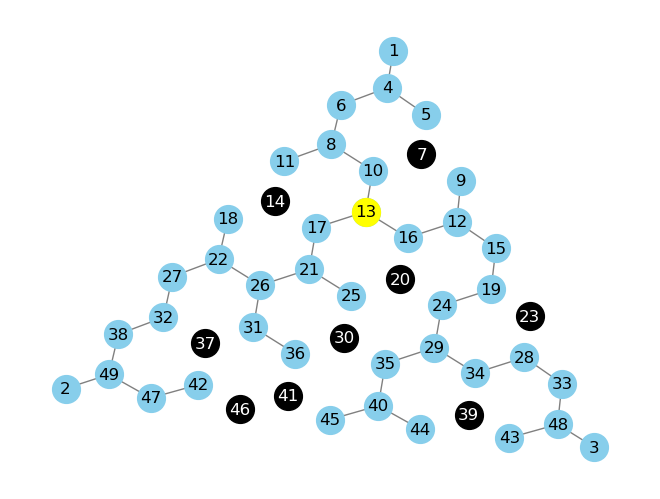

Path lengths: [15, 21, 19]


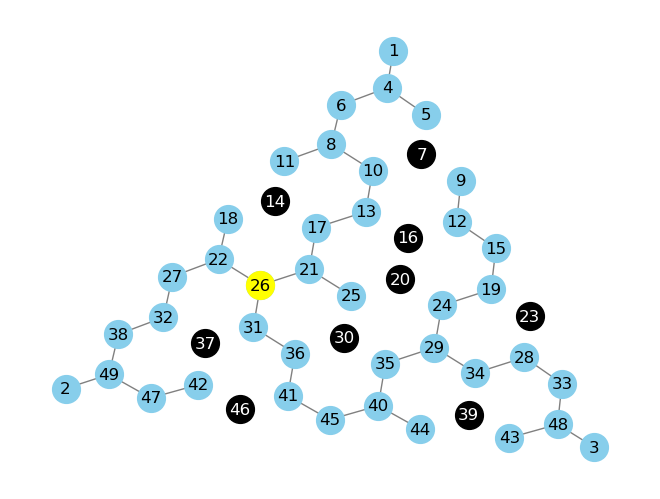

Path lengths: [25, 17, 19]


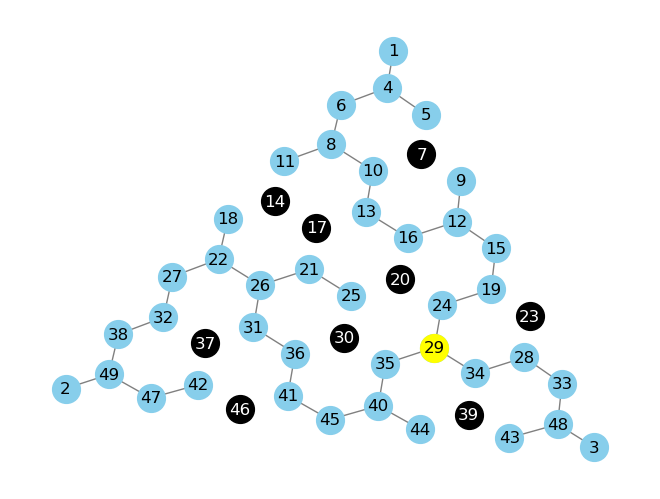

Path lengths: [15, 21, 19]


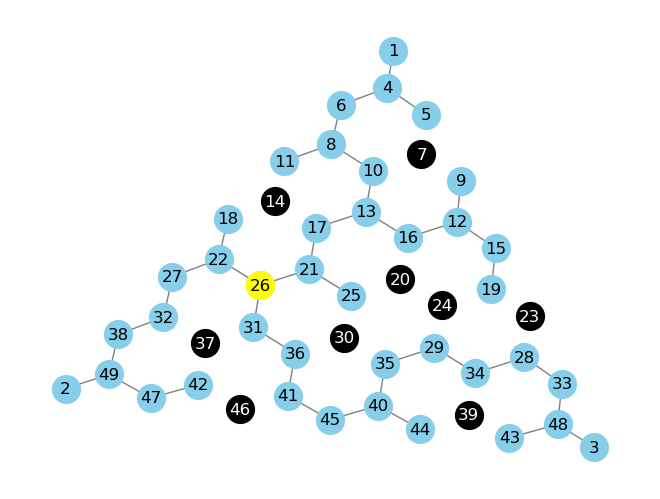

Path lengths: [15, 21, 19]


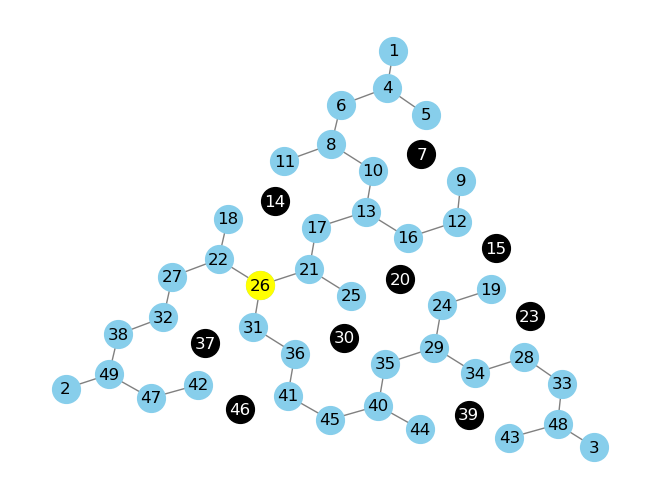

Path lengths: [15, 21, 19]


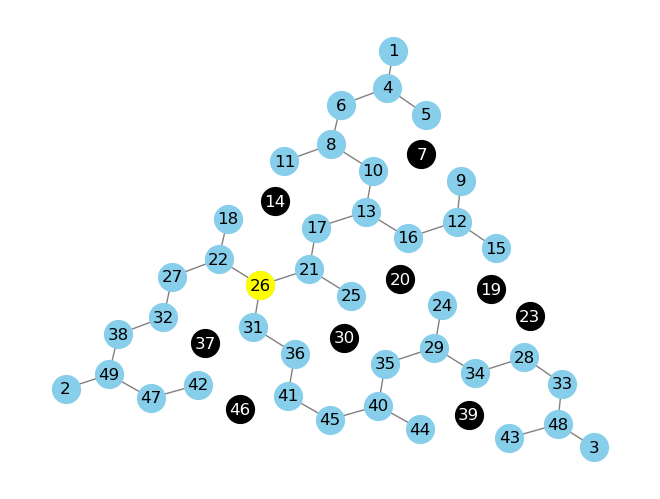

In [4]:
# Lets try our functions.
from hex_maze_utils import get_next_barrier_sets_v2, plot_hex_maze, df_lookup

orig_bars = {37, 39, 7, 41, 14, 46, 20, 23, 30}
print(f"Original path lengths: {df_lookup(df, orig_bars, 'reward_path_lengths')}")
plot_hex_maze(orig_bars)

next_bars = get_next_barrier_sets_v2(df, orig_bars)

for bars in next_bars:
    print(f"Path lengths: {df_lookup(df, bars, 'reward_path_lengths')}")
    plot_hex_maze(bars)



Original path lengths: [15, 17, 21]


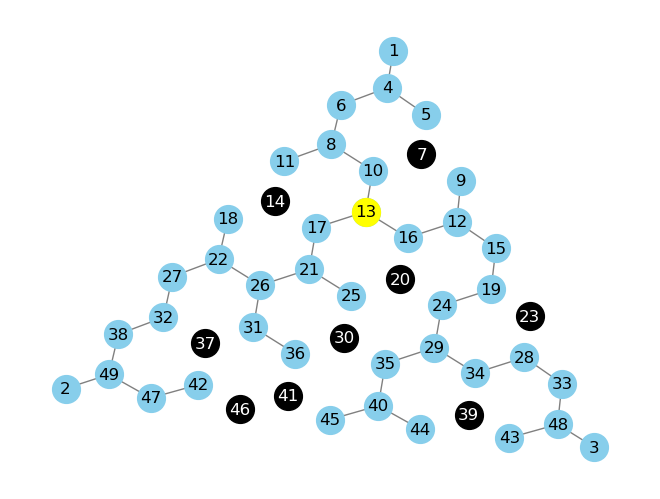

[frozenset({37, 39, 7, 41, 14, 46, 20, 23, 30}), frozenset({37, 39, 7, 46, 14, 16, 20, 23, 30}), frozenset({37, 39, 7, 14, 46, 17, 20, 23, 30}), frozenset({37, 39, 7, 14, 46, 17, 23, 24, 30})]
Path lengths: [15, 17, 21]
Path lengths: [15, 21, 19]
Path lengths: [25, 17, 19]
Path lengths: [17, 23, 19]
[frozenset({37, 39, 7, 41, 14, 46, 20, 23, 30}), frozenset({37, 39, 7, 14, 46, 17, 20, 23, 30}), frozenset({37, 39, 7, 46, 14, 16, 20, 23, 30})]
Path lengths: [15, 17, 21]
Path lengths: [25, 17, 19]
Path lengths: [15, 21, 19]
[frozenset({37, 39, 7, 41, 14, 46, 20, 23, 30}), frozenset({37, 39, 7, 14, 46, 17, 20, 23, 30}), frozenset({37, 39, 7, 46, 14, 20, 23, 24, 30})]
Path lengths: [15, 17, 21]
Path lengths: [25, 17, 19]
Path lengths: [15, 21, 19]
[frozenset({37, 39, 7, 41, 14, 46, 20, 23, 30}), frozenset({37, 39, 7, 14, 46, 17, 20, 23, 30}), frozenset({37, 7, 39, 14, 15, 46, 20, 23, 30})]
Path lengths: [15, 17, 21]
Path lengths: [25, 17, 19]
Path lengths: [15, 21, 19]
[frozenset({37, 39, 7

In [5]:
from hex_maze_utils import find_all_valid_barrier_sequences, df_lookup, plot_hex_maze

orig_bars = frozenset({37, 39, 7, 41, 14, 46, 20, 23, 30})

print(f"Original path lengths: {df_lookup(df, orig_bars, 'reward_path_lengths')}")
plot_hex_maze(orig_bars)

next_sequences = find_all_valid_barrier_sequences(df, orig_bars)

for sequence in next_sequences:
    print(sequence)
    for bars in sequence:
        print(f"Path lengths: {df_lookup(df, bars, 'reward_path_lengths')}")
    #plot_hex_maze(bar)

Maze 1:


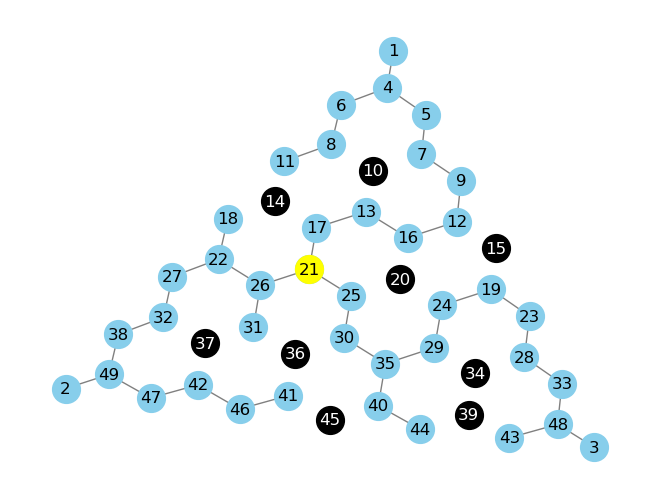

Potential maze 2:


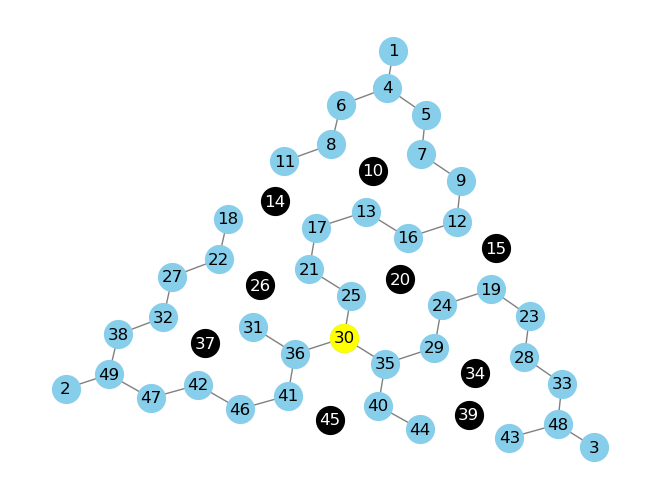

Potential maze 3:


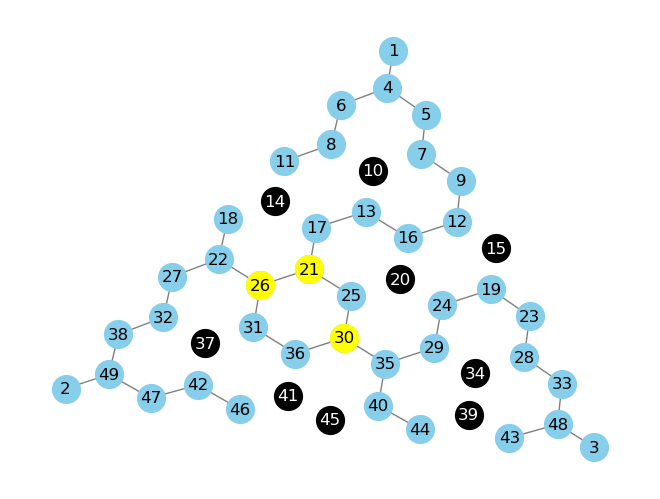

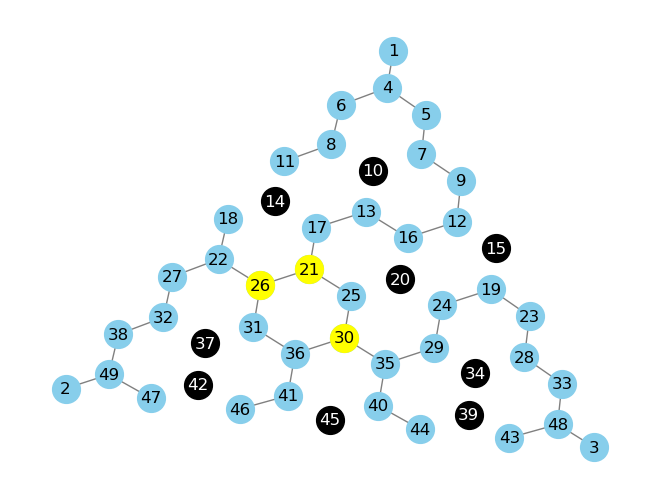

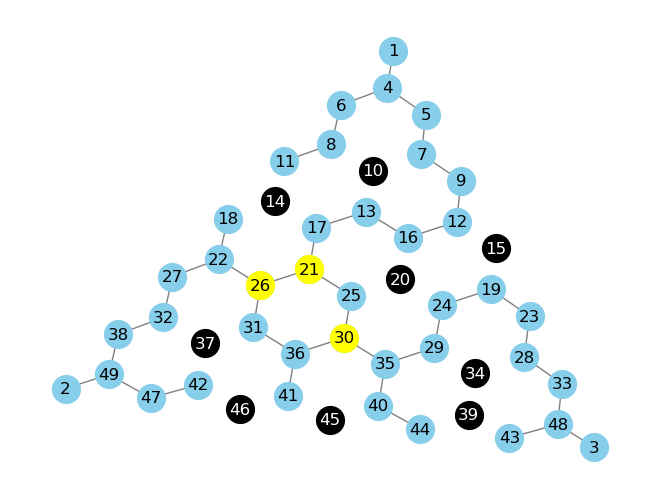

In [19]:
from hex_maze_utils import plot_hex_maze

print("Maze 1:")
plot_hex_maze({34, 36, 37, 39, 10, 45, 14, 15, 20})
print("Potential maze 2:")
plot_hex_maze({34, 37, 39, 10, 45, 14, 15, 20, 26})
#plot_hex_maze({32, 34, 37, 39, 10, 45, 14, 15, 20})
#plot_hex_maze({34, 37, 39, 10, 45, 14, 15, 20, 27})
print("Potential maze 3:")
plot_hex_maze({34, 37, 39, 41, 10, 45, 14, 15, 20})
plot_hex_maze({34, 37, 39, 10, 42, 45, 14, 15, 20})
plot_hex_maze({34, 37, 39, 10, 45, 14, 15, 46, 20})

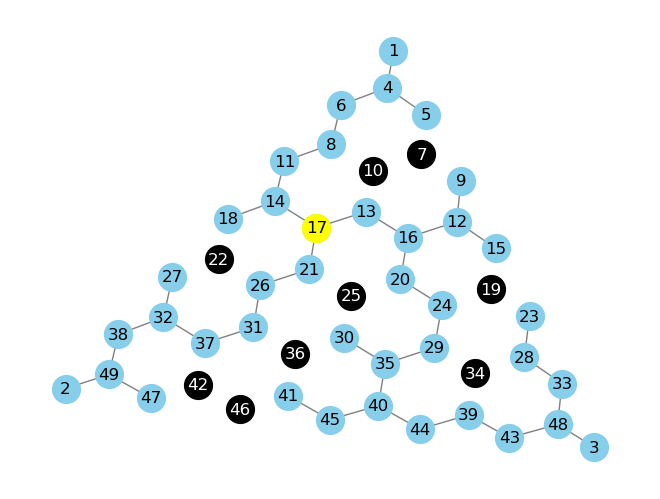

We have 2 sets of potential next barriers:
frozenset({34, 36, 8, 10, 42, 46, 19, 22, 25})
next barriers for this set:
{frozenset({34, 36, 9, 10, 42, 46, 19, 22, 25})}

frozenset({34, 36, 10, 11, 42, 46, 19, 22, 25})
next barriers for this set:
{frozenset({34, 36, 9, 10, 42, 46, 19, 22, 25})}



In [25]:
original_barriers = {34, 36, 7, 10, 42, 46, 19, 22, 25}
plot_hex_maze(original_barriers)

potential_next_barriers = get_next_barrier_set(df, original_barriers)


print(f"We have {len(potential_next_barriers)} sets of potential next barriers:")
for b in potential_next_barriers:
    print(b)
    next_barriers = set(get_next_barrier_set(df, b))
    next_barriers.discard(original_barriers) # make sure we don't go backwards!!
    print("next barriers for this set:")
    print(next_barriers)
    print("")


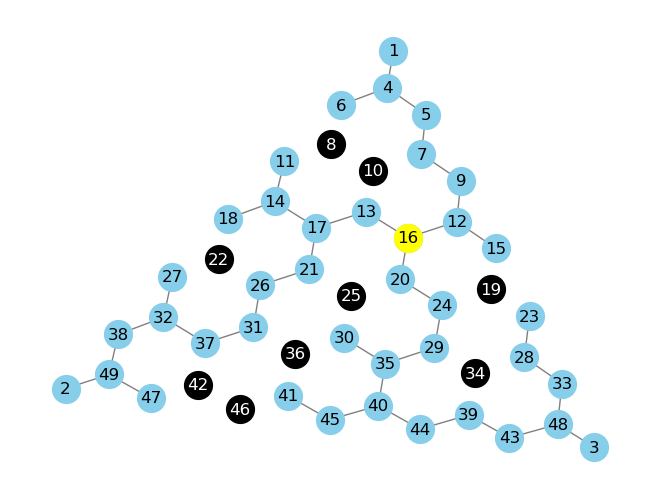

In [26]:
plot_hex_maze({34, 36, 8, 10, 42, 46, 19, 22, 25})

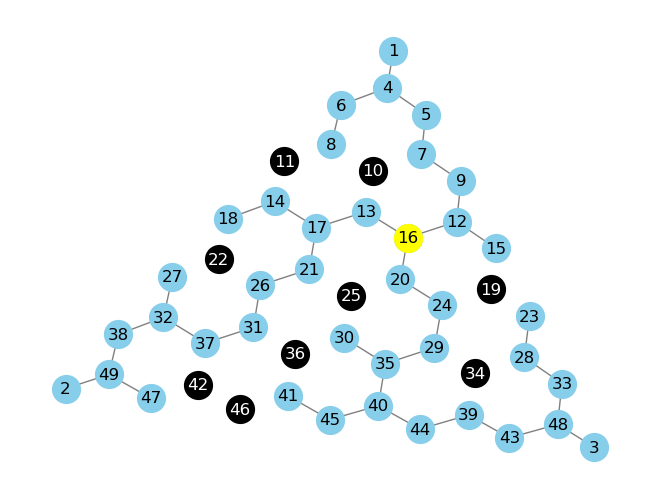

In [29]:
plot_hex_maze({34, 36, 10, 11, 42, 46, 19, 22, 25})

In [58]:
from hex_maze_utils import get_next_barrier_set

# Load the database
df = pd.read_pickle('maze_configuration_database.pkl')


original_barriers = frozenset({34, 36, 7, 10, 42, 46, 19, 22, 25})
next_barrier_sequences = find_all_valid_barrier_sequences(original_barriers)

for sequence in next_barrier_sequences:
    print(sequence)
    for bar in sequence:
        # Get the path lengths between reward ports for this new barrier set
        path_lengths = df[(df['barriers'] == bar)]['reward_path_lengths'].item()
        # Get the choice points between reward ports for this new barrier set
        choice_points = df[(df['barriers'] == bar)]['choice_points'].item()
        print(f"Path lengths: {path_lengths} Choice points: {choice_points}")

[frozenset({34, 36, 7, 10, 42, 46, 19, 22, 25}), frozenset({34, 36, 8, 10, 42, 46, 19, 22, 25})]
Path lengths: [15, 19, 21] Choice points: {17}
Path lengths: [17, 17, 21] Choice points: {16}
[frozenset({34, 36, 7, 10, 42, 46, 19, 22, 25}), frozenset({34, 36, 10, 11, 42, 46, 19, 22, 25})]
Path lengths: [15, 19, 21] Choice points: {17}
Path lengths: [17, 17, 21] Choice points: {16}


In [ ]:
#Trash below here

In [59]:

barrier_sequence = []

original_barriers = {34, 36, 37, 39, 10, 45, 14, 15, 20}

barrier_sequence.append(original_barriers)

potential_next_barriers = get_next_barrier_set(df, original_barriers)

print(f"We have {len(potential_next_barriers)} sets of potential next barriers:")
for b in potential_next_barriers:
    print(b)
    next_barriers = set(get_next_barrier_set(df, b))
    next_barriers.discard(original_barriers) # make sure we don't go backwards!!
    print("next barriers for this set:")
    print(next_barriers)
    print("")






We have 3 sets of potential next barriers:
frozenset({34, 37, 39, 10, 45, 14, 15, 20, 26})
next barriers for this set:
{frozenset({34, 37, 39, 41, 10, 45, 14, 15, 20}), frozenset({34, 37, 39, 10, 42, 45, 14, 15, 20}), frozenset({34, 37, 39, 10, 45, 14, 15, 46, 20})}

frozenset({32, 34, 37, 39, 10, 45, 14, 15, 20})
next barriers for this set:
{frozenset({34, 37, 39, 41, 10, 45, 14, 15, 20}), frozenset({34, 37, 39, 10, 42, 45, 14, 15, 20}), frozenset({34, 37, 39, 10, 45, 14, 15, 46, 20})}

frozenset({34, 37, 39, 10, 45, 14, 15, 20, 27})
next barriers for this set:
{frozenset({34, 37, 39, 41, 10, 45, 14, 15, 20}), frozenset({34, 37, 39, 10, 42, 45, 14, 15, 20}), frozenset({34, 37, 39, 10, 45, 14, 15, 46, 20})}

